<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/UninformedSearched_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métodos de busqueda no-informada**

Exiten varios métodos de búsqueda no-informada, por ejemplo:
* Breadth-first search 
* Uniform-cost search
* Depth-first search
* Depth-limited search
* Iterative deepening search

En este ejemplo se realizarán las clases y métodos necesarios para ejecutar este tipo de busqueda en cualquier ejercicio.

In [50]:
class Node():
    def __init__(self,node_description,cost=0):
        self.value = node_description
        self.parent = None
        self.cost = cost
        self.childs = []

class Tree():

    def __init__(self,node_description,cost=0):
        self.Node = Node(node_description,cost)
    
    def addEdge(self, node_description,cost=0):
        edge = Tree(node_description,cost)
        edge.Node.parent = self.Node
        edge.Node.cost = edge.Node.cost + self.Node.cost
        self.Node.childs.append(edge)

    def getEdge(self, child_index):
        return self.Node.childs[child_index]

    def BFS(self, goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in range(number_childs):
                queue.append(node.getEdge(i))
    
    def UCS(self,goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            self.order_by_cost(queue)
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            for i in range(number_childs):
                queue.append(node.getEdge(i))

    def order_by_cost(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if queue[i].Node.cost > queue[j].Node.cost :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def get_solution(self, node):
        if(node == None):
            return
        else:
            print("Node: " + str(node.value) + " - Cost: " + str(node.cost))
            self.get_solution(node.parent)


El arbol desarrollado para probar el método UCS es:

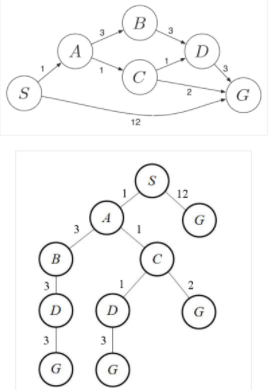

In [51]:
tree = Tree('S')
tree.addEdge('A' , 1)
tree.addEdge('G' , 12)

first_edge = tree.getEdge(0)
first_edge.addEdge('B', 3)
first_edge.addEdge('C', 1)

second_edge = first_edge.getEdge(0)
second_edge.addEdge('D', 3)
second_edge.addEdge('G', 1)

third_edge = first_edge.getEdge(1)
third_edge.addEdge('D', 1)
third_edge.addEdge('G', 2)

fourth_edge = third_edge.getEdge(0)
fourth_edge.addEdge('G', 3)

tree.UCS('G')

Node: G - Cost: 4
Node: C - Cost: 2
Node: A - Cost: 1
Node: S - Cost: 0
